# \Sigma_{a2} в зависимости от плотности теплоносителя, температуры теплоносителя, температуры топлива и концентрации борной кислоты

## 1. Загрузка данных

In [1]:
import pandas as pd

Загрузка данных

In [2]:
df = pd.read_excel('Input/Data.xlsx')
df.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),3S_{tr1}(1),3S_{tr2}(2),\Sigma_{a1}(3),\Sigma_{a2}(4),nuS_{f1}(5),nuS_{f2}(6),\Sigma_{f1}(7),\Sigma_{f2}(8),\Sigma_{1->2}(9),k_{inf}(10),\sigma_{a2}^{Xe},\sigma_{a2}^{Sm}
0,0.7235,575.0,1027.0,600.0,0.661853,2.568298,0.009376,0.085584,0.006677,0.133250,0.002620,0.054750,0.017392,1.261041,1072970.0,35421.398
1,0.7750,448.0,1043.0,1500.0,0.679602,2.874687,0.009581,0.098339,0.006723,0.139256,0.002636,0.057218,0.018726,1.174265,1141000.0,36147.801
2,0.9125,370.5,1418.0,750.0,0.727336,3.668742,0.009908,0.102815,0.006844,0.153823,0.002681,0.063203,0.022463,1.249619,1308480.0,39214.000


In [3]:
names = ['\\rho(g/cm^3)',
 'T_c(K)',
 'T_f(K)',
 'c_b(ppm)',
 '\Sigma_{a2}(4)']

In [4]:
train_dataset = df[names].sample(frac=0.8,random_state=0)
test_dataset = df[names].drop(train_dataset.index)

In [5]:
train_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a2}(4)
158,0.798633,405.61719,486.35941,855.46881,0.097073
83,0.701953,561.82812,1664.09400,1195.31200,0.088498
170,1.047852,294.21091,1447.29700,1746.09400,0.123494


In [6]:
test_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a2}(4)
9,0.878125,544.8750,1511.750,562.50,0.091930
21,1.032812,477.0625,1746.125,2343.75,0.117570
25,0.860937,496.4375,339.875,1031.25,0.097283


## 2. Визуализация данных

### 2.1 Корреляционная матрица

<AxesSubplot:>

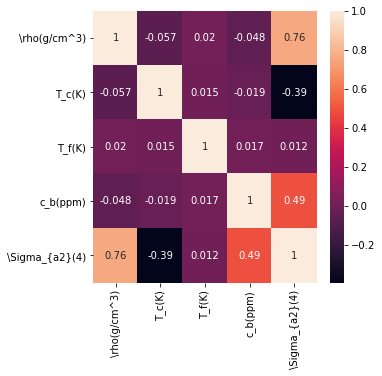

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5)) # Sample figsize in inches
sns.heatmap(train_dataset[names].corr(), annot = True, fmt='.2g')

### 2.2 Диаграммы рассеяния

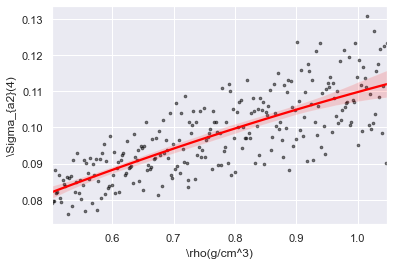

In [8]:
import seaborn as sns
sns.set_theme(color_codes=True)

ax = sns.regplot(x=df['\\rho(g/cm^3)'],
                 y="\Sigma_{a2}(4)",
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = 2)

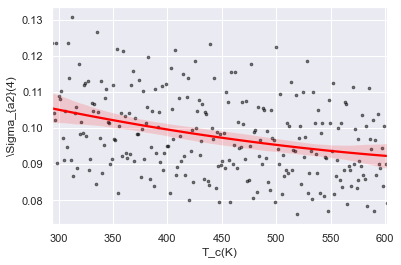

In [9]:
import seaborn as sns
sns.set_theme(color_codes=True)

ax = sns.regplot(x=df['T_c(K)'],
                 y="\Sigma_{a2}(4)",
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = 2)

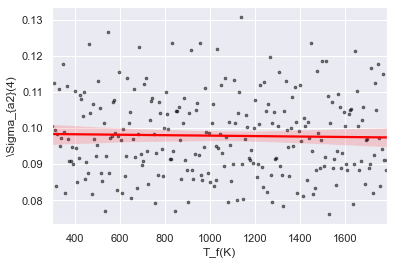

In [10]:
import seaborn as sns
sns.set_theme(color_codes=True)

ax = sns.regplot(x=df['T_f(K)'],
                 y="\Sigma_{a2}(4)",
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = 1)

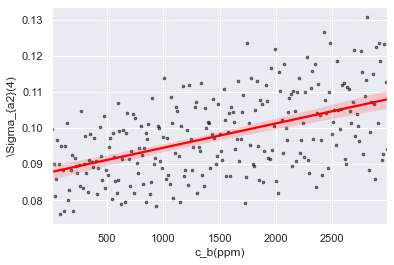

In [11]:
import seaborn as sns
sns.set_theme(color_codes=True)

ax = sns.regplot(x=df['c_b(ppm)'],
                 y="\Sigma_{a2}(4)",
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = 1)

## 3. Линейная регрессия

In [12]:
import statsmodels.api as sm
import statsmodels as statsmodels

train_data = train_dataset[names[:-1]]
train_data = sm.add_constant(train_data)

test_data = test_dataset[names[:-1]]
test_data = sm.add_constant(test_data)

display(train_data.head(3))
display(test_data.head(3))

,const,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
158,1.0,0.798633,405.61719,486.35941,855.46881
83,1.0,0.701953,561.82812,1664.09400,1195.31200
170,1.0,1.047852,294.21091,1447.29700,1746.09400


,const,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
9,1.0,0.878125,544.8750,1511.750,562.50
21,1.0,1.032812,477.0625,1746.125,2343.75
25,1.0,0.860937,496.4375,339.875,1031.25


In [13]:
train_labels = train_dataset['\\Sigma_{a2}(4)']
display(train_labels.head(3))

test_labels = test_dataset['\\Sigma_{a2}(4)']
display(test_labels.head(3))

158    0.097073
83     0.088498
170    0.123494
Name: \Sigma_{a2}(4), dtype: float64

9     0.091930
21    0.117570
25    0.097283
Name: \Sigma_{a2}(4), dtype: float64

In [14]:
model = sm.OLS(train_labels, train_data)

fit = model.fit()
g = fit.summary()
g

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         \Sigma_{a2}(4)   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1679.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.58e-153
Time:                        10:13:37   Log-Likelihood:                 998.63
No. Observations:                 206   AIC:                            -1987.
Df Residuals:                     201   BIC:                            -1971.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0648      0.001     61.666      0.000       0.063       0.067
\rho(g/cm^3)     0.0540      0.001     63.402      0.000       0.052       0.056
T_c(K)       -4.163e-05   1.48e-06    -28.071      0.000   -4.46e-05   -3.87e-05
T_f(K)       -1.947e-07   3.16e-07     -0.615      0.539   -8.19e-07    4.29e-07
c_b(ppm)      6.735e-06   1.55e-07     43.486      0.000    6.43e-06    7.04e-06
==============================================================================
Omnibus:                       17.557   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.877
Skew:                          -0.577   Prob(JB):                     1.08e-05
Kurtosis:                       4.154   Cond. No.                     1.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
g = fit.pvalues
g

const           1.531535e-132
\rho(g/cm^3)    7.570263e-135
T_c(K)           1.796122e-71
T_f(K)           5.392236e-01
c_b(ppm)        3.352529e-104
dtype: float64

T_f(K) - не значим на 10-ом % урвоне значимости

In [16]:
features = ['\\rho(g/cm^3)', 'T_c(K)', 'c_b(ppm)']

In [17]:
train_data = train_dataset[features]
train_data = sm.add_constant(train_data)

train_data.head(3)

,const,\rho(g/cm^3),T_c(K),c_b(ppm)
158,1.0,0.798633,405.61719,855.46881
83,1.0,0.701953,561.82812,1195.31200
170,1.0,1.047852,294.21091,1746.09400


In [18]:
model = sm.OLS(train_labels, train_data)

fit = model.fit()
g = fit.summary()
g

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         \Sigma_{a2}(4)   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2245.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.39e-155
Time:                        10:13:37   Log-Likelihood:                 998.43
No. Observations:                 206   AIC:                            -1989.
Df Residuals:                     202   BIC:                            -1976.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0647      0.001     64.310      0.000       0.063       0.067
\rho(g/cm^3)     0.0540      0.001     63.502      0.000       0.052       0.056
T_c(K)       -4.164e-05   1.48e-06    -28.128      0.000   -4.46e-05   -3.87e-05
c_b(ppm)      6.734e-06   1.55e-07     43.549      0.000    6.43e-06    7.04e-06
==============================================================================
Omnibus:                       17.051   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.267
Skew:                          -0.562   Prob(JB):                     1.46e-05
Kurtosis:                       4.154   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
p = fit.pvalues
p

const           1.722241e-136
\rho(g/cm^3)    1.962805e-135
T_c(K)           8.678308e-72
c_b(ppm)        1.251020e-104
dtype: float64

Все регрессоры значимы на 1-ом уровне значимости %.

In [20]:
ypred = fit.predict(train_data)
ypred

158    0.096658
83     0.087220
170    0.120754
101    0.116554
150    0.120150
         ...   
151    0.088743
202    0.122456
31     0.077949
209    0.104405
127    0.078853
Length: 206, dtype: float64

In [21]:
train_labels

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
         ...   
151    0.088855
202    0.126619
31     0.079524
209    0.105022
127    0.079581
Name: \Sigma_{a2}(4), Length: 206, dtype: float64

Mean squared error

\begin{align*}
\text{MSE} = \frac{1}{N} \text{RSS} = \frac{1}{N} \sum (f_i -y_i)^2
\end{align*}

In [22]:
MSE = statsmodels.tools.eval_measures.mse(train_labels, ypred)
MSE

3.611481567630849e-06

Root mean squared error

\begin{align*}
\sigma = \sqrt{MSE}
\end{align*}

In [23]:
RMSE = statsmodels.tools.eval_measures.rmse(train_labels, ypred)
RMSE

0.0019003898462238871

Root Mean Squared Percentage Error

In [24]:
RMSPE = statsmodels.tools.eval_measures.rmspe(train_labels, ypred)
RMSPE

0.2019302004214711

In [25]:
train_labels

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
         ...   
151    0.088855
202    0.126619
31     0.079524
209    0.105022
127    0.079581
Name: \Sigma_{a2}(4), Length: 206, dtype: float64

In [26]:
ypred

158    0.096658
83     0.087220
170    0.120754
101    0.116554
150    0.120150
         ...   
151    0.088743
202    0.122456
31     0.077949
209    0.104405
127    0.078853
Length: 206, dtype: float64

Root Mean Squared Percentage Error for test data

In [27]:
test_data = test_dataset[features]
test_data = sm.add_constant(test_data)
ypred = fit.predict(test_data)

RMSPE = statsmodels.tools.eval_measures.rmspe(test_labels, ypred)
RMSPE

0.178229042661628

In [28]:
train_data

,const,\rho(g/cm^3),T_c(K),c_b(ppm)
158,1.0,0.798633,405.61719,855.46881
83,1.0,0.701953,561.82812,1195.31200
170,1.0,1.047852,294.21091,1746.09400
101,1.0,1.002734,527.92188,2929.68800
150,1.0,0.901758,308.74219,2917.96900
...,...,...,...,...
151,1.0,0.626758,463.74219,1417.96900
202,1.0,1.026367,335.38281,2425.78100
31,1.0,0.517187,457.68750,656.25000
209,1.0,0.837305,538.82031,2519.53100


In [29]:
#Добавим квадраты исходя из диаграмм рассеяния
train_data['\\rho(g/cm^3)^2'] = train_data['\\rho(g/cm^3)']*train_data['\\rho(g/cm^3)']
train_data['T_c(K)^2'] = train_data['T_c(K)']*train_data['T_c(K)']
train_data

,const,\rho(g/cm^3),T_c(K),c_b(ppm),\rho(g/cm^3)^2,T_c(K)^2
158,1.0,0.798633,405.61719,855.46881,0.637814,164525.304823
83,1.0,0.701953,561.82812,1195.31200,0.492738,315650.836423
170,1.0,1.047852,294.21091,1746.09400,1.097994,86560.059563
101,1.0,1.002734,527.92188,2929.68800,1.005475,278701.511383
150,1.0,0.901758,308.74219,2917.96900,0.813167,95321.739886
...,...,...,...,...,...,...
151,1.0,0.626758,463.74219,1417.96900,0.392825,215056.818786
202,1.0,1.026367,335.38281,2425.78100,1.053429,112481.629243
31,1.0,0.517187,457.68750,656.25000,0.267483,209477.847656
209,1.0,0.837305,538.82031,2519.53100,0.701079,290327.326468


In [30]:
model = sm.OLS(train_labels, train_data)

fit = model.fit()
g = fit.summary()
g

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         \Sigma_{a2}(4)   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1451.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.25e-155
Time:                        10:13:37   Log-Likelihood:                 1006.9
No. Observations:                 206   AIC:                            -2002.
Df Residuals:                     200   BIC:                            -1982.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0594      0.005     12.209      0.000       0.050       0.069
\rho(g/cm^3)       0.0853      0.009      9.719      0.000       0.068       0.103
T_c(K)         -7.124e-05   1.57e-05     -4.552      0.000      -0.000   -4.04e-05
c_b(ppm)        6.721e-06   1.49e-07     45.047      0.000    6.43e-06    7.01e-06
\rho(g/cm^3)^2    -0.0203      0.006     -3.590      0.000      -0.031      -0.009
T_c(K)^2        3.317e-08   1.74e-08      1.905      0.058   -1.16e-09    6.75e-08
==============================================================================
Omnibus:                        5.764   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                8.727
Skew:                           0.029   Prob(JB):                       0.0127
Kurtosis:                       4.007   Cond. No.                     1.90e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
p = fit.pvalues
p

const              5.586315e-26
\rho(g/cm^3)       1.557531e-18
T_c(K)             9.208072e-06
c_b(ppm)          1.145045e-106
\rho(g/cm^3)^2     4.153586e-04
T_c(K)^2           5.819901e-02
dtype: float64

In [32]:
ypred = fit.predict(train_data)
ypred

158    0.096940
83     0.087800
170    0.120210
101    0.115913
150    0.120651
         ...   
151    0.088557
202    0.121775
31     0.076877
209    0.104823
127    0.077725
Length: 206, dtype: float64

In [33]:
train_labels

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
         ...   
151    0.088855
202    0.126619
31     0.079524
209    0.105022
127    0.079581
Name: \Sigma_{a2}(4), Length: 206, dtype: float64

In [34]:
#Добавим квадраты исходя из диаграмм рассеяния к тестовым данным
test_data['\\rho(g/cm^3)^2'] = test_data['\\rho(g/cm^3)']*test_data['\\rho(g/cm^3)']
test_data['T_c(K)^2'] = test_data['T_c(K)']*test_data['T_c(K)']

In [35]:
ypred = fit.predict(test_data)

RMSPE = statsmodels.tools.eval_measures.rmspe(test_labels, ypred)
RMSPE

0.17658940234303516